In [ ]:
import pandas as pd
import numpy as np

# upload files
from google.colab import files
import io
import matplotlib.pyplot as plt
import seaborn as sns

# formatos csv, json
import csv
import json

# etc.
import os
from google.colab import drive
drive.mount('/content/drive')

from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction import DictVectorizer
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import Adam

import pickle
import tensorflow as tf

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# Importamos el dataset con los datos limpios
data = pd.read_json('/content/drive/MyDrive/IABD/datasets/cochesnet/cochesnet.json')
data

,color,fuelType,km,make,model,price,province,transmissionType,year,seller_type,bodyType,cubicCapacity,doors,hp
0,RED,GASOLINA,49357,SMART,FORTWO,12790,MADRID,AUTOMATIC,2018,PROFESIONAL,SEDAN,898,3,90
1,WHITE,GASOLINA,69000,SMART,FORTWO,13990,ZAMORA,AUTOMATIC,2019,PROFESIONAL,CABRIO,898,2,90
2,BLACK,GASOLINA,89000,SMART,FORTWO,8990,TARRAGONA,AUTOMATIC,2015,PROFESIONAL,SEDAN,999,3,84
3,BLACK,GASOLINA,40000,SMART,FORFOUR,12500,SALAMANCA,MANUAL,2017,PROFESIONAL,SEDAN,898,5,90
4,BLACK,GASOLINA,25000,SMART,FORTWO,18900,MÁLAGA,AUTOMATIC,2020,PROFESIONAL,CABRIO,999,2,71
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12761,WHITE,DIÉSEL,139383,MAZDA,CX5,20900,A CORUÑA,MANUAL,2019,PROFESIONAL,4X4 SUV,2191,5,150
12762,RED,DIÉSEL,69000,MAZDA,CX5,24999,MADRID,AUTOMATIC,2019,PROFESIONAL,4X4 SUV,2191,5,150
12763,WHITE,GASOLINA,63912,MAZDA,MX5,19400,MADRID,MANUAL,2016,PROFESIONAL,CABRIO,1998,2,160
12764,GRAY,DIÉSEL,79000,MAZDA,CX5,17400,CASTELLÓN,AUTOMATIC,2015,PROFESIONAL,4X4 SUV,2191,5,150


In [ ]:
campos_numericos = ['km', 'year', 'cubicCapacity', 'doors', 'hp']

campos_categoricos = ['color', 'fuelType', 'make', 'model', 'province', 'transmissionType', 'seller_type', 'bodyType']


all_feature_names = campos_numericos + campos_categoricos

target = 'price'

#used_features = all_feature_names.append(target)
used_features = all_feature_names + [target]

In [ ]:
data

In [ ]:
# Aplicamos el escalador 
scaler = MinMaxScaler()
data[campos_numericos] = scaler.fit_transform(data[campos_numericos])

max_valor_original = scaler.data_max_[0]
min_valor_original = scaler.data_min_[0]

data.to_json('/content/drive/MyDrive/IABD/datasets/cochesnet/cochesnet_scaled.json')

In [ ]:
train_data, test_data, _ = np.split(data.sample(frac=1, random_state=123), [int(0.70*len(data)), int(len(data))])

X_train_full, X_test = train_test_split(data[used_features], test_size=0.3, random_state=12)
X_train, X_val = train_test_split(X_train_full, test_size=0.33, random_state=1)

print(len(train_data), len(test_data))
print(len(X_train_full), len(X_test), len(X_train), len(X_val))

8936 3830
8936 3830 5987 2949


In [ ]:
y_train = X_train[target].values
y_val = X_val[target].values
y_test = X_test[target].values

X_train.drop([target], axis=1, inplace=True)
X_val.drop([target], axis=1, inplace=True)
X_test.drop([target], axis=1, inplace=True)

In [ ]:
X_val

,km,year,cubicCapacity,doors,hp,color,fuelType,make,model,province,transmissionType,seller_type,bodyType
7308,0.607388,0.2,0.362261,1.000000,0.296970,GRAY,DIÉSEL,MERCEDES-BENZ,CLASE A,MURCIA,MANUAL,PROFESIONAL,SEDAN
4260,0.411765,0.9,0.156653,1.000000,0.248485,BLUE,GAS LICUADO (GLP),DACIA,SANDERO,TARRAGONA,MANUAL,PARTICULAR,SEDAN
2124,0.358341,0.4,0.600801,1.000000,0.727273,GRAY,DIÉSEL,PEUGEOT,3008,STA. C. TENERIFE,AUTOMATIC,PROFESIONAL,4X4
10975,0.128118,0.7,0.423231,1.000000,0.424242,BLACK,DIÉSEL,BMW,X5,ÁLAVA,AUTOMATIC,PROFESIONAL,4X4 SUV
4455,0.073506,0.8,0.156208,1.000000,0.393939,GARNET,GASOLINA,FORD,PUMA,STA. C. TENERIFE,MANUAL,PROFESIONAL,4X4
...,...,...,...,...,...,...,...,...,...,...,...,...,...
8922,0.688235,0.1,0.111704,1.000000,0.181818,BLACK,GASOLINA,RENAULT,CLIO,BALEARES,MANUAL,PROFESIONAL,FAMILIAR
10128,0.505882,0.8,0.423231,1.000000,0.424242,BLACK,DIÉSEL,AUDI,A6 ALLROAD QUATTRO,ALBACETE,AUTOMATIC,PROFESIONAL,FAMILIAR
12602,0.359412,0.6,0.687138,0.666667,0.696970,RED,DIÉSEL,MAZDA,MAZDA6,ALBACETE,MANUAL,PROFESIONAL,BERLINA
12726,0.283824,0.5,0.687138,1.000000,0.545455,RED,DIÉSEL,MAZDA,CX5,PONTEVEDRA,MANUAL,PROFESIONAL,4X4 SUV


In [ ]:
#las filas se convierten a formato de diccionario
train_dict = X_train[all_feature_names].to_dict(orient='records')

In [ ]:
dv = DictVectorizer(sparse=False)
dv.fit(train_dict)
X_train = dv.transform(train_dict)

In [ ]:
X_train[0]

array([1.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 1.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.37917223, 1.        , 1.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.42424242, 0.49263529, 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 1.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.     

In [ ]:
dv.get_feature_names_out()

# RED NEURONAL

In [ ]:
# DEFINIMOS EL MODELO DE LA RED NEURONAL
model = Sequential()
model.add(Dense(len(X_train[0]), input_shape=(len(X_train[0]),), activation='relu', kernel_initializer="he_uniform"))
model.add(Dense(int(len(X_train[0])/2), activation='relu', kernel_initializer="he_uniform"))
model.add(Dense(1, kernel_initializer="glorot_uniform", activation='linear'))

# compile the keras model
learning_rate = 0.001
optimizer = Adam(learning_rate=learning_rate)

model.compile(loss='mean_squared_error', optimizer='Adam')

# ENTRENAMOS EL MODELO
history = model.fit(X_train,y_train, epochs=250, batch_size=768, validation_split=0.2)

Epoch 1/250
7/7 [==============================] - 1s 57ms/step - loss: 521974464.0000 - val_loss: 519680032.0000
Epoch 2/250
7/7 [==============================] - 0s 40ms/step - loss: 521689376.0000 - val_loss: 519254816.0000
Epoch 3/250
7/7 [==============================] - 0s 38ms/step - loss: 521129696.0000 - val_loss: 518432000.0000
Epoch 4/250
7/7 [==============================] - 0s 37ms/step - loss: 520076384.0000 - val_loss: 516961440.0000
Epoch 5/250
7/7 [==============================] - 0s 40ms/step - loss: 518264608.0000 - val_loss: 514518336.0000
Epoch 6/250
7/7 [==============================] - 0s 36ms/step - loss: 515324576.0000 - val_loss: 510723200.0000
Epoch 7/250
7/7 [==============================] - 0s 40ms/step - loss: 510864832.0000 - val_loss: 505149952.0000
Epoch 8/250
7/7 [==============================] - 1s 85ms/step - loss: 504465216.0000 - val_loss: 497363200.0000
Epoch 9/250
7/7 [==============================] - 1s 118ms/step - loss: 495673344.0000 

In [ ]:
# evaluate the keras model
mse= model.evaluate(X_train, y_train)
print('mse: %.2f' % (mse))

model.history

188/188 [==============================] - 0s 2ms/step - loss: 16786312.0000
mse: 16786312.00


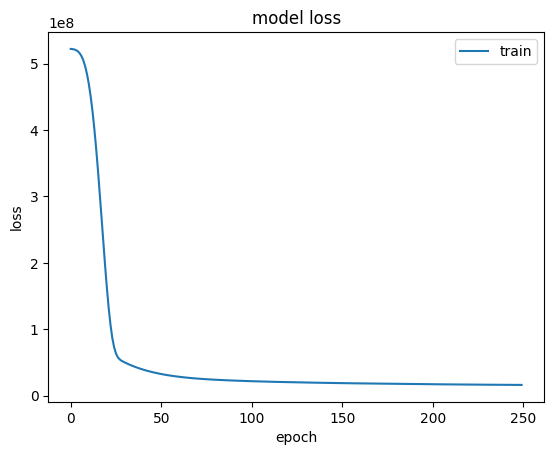

In [ ]:
plt.plot(history.history["loss"])
plt.title("model loss")
plt.ylabel("loss")
plt.xlabel("epoch")
plt.legend(["train"], loc="upper right")
plt.show()

120/120 [==============================] - 0s 2ms/step


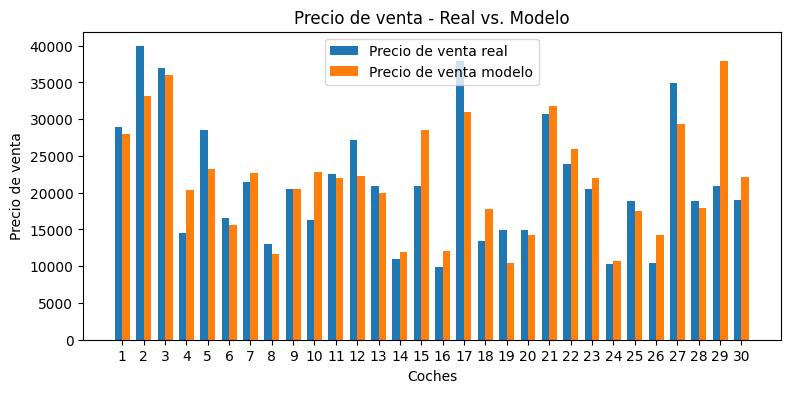

In [ ]:
X_test = dv.transform(X_test[all_feature_names].to_dict(orient = 'records'))
y_pred = model.predict(X_test).squeeze()

ind = np.arange(30)
width = 0.35

plt.figure(figsize=(9,4))
plt.bar(ind, y_test[:30], width, label='Precio de venta real')
plt.bar(ind+width, y_pred[:30], width, label='Precio de venta modelo')

plt.xticks(ind+width/2, np.arange(1, 31))
plt.legend(loc='best')

plt.xlabel('Coches')
plt.ylabel('Precio de venta')
plt.title('Precio de venta - Real vs. Modelo')

plt.show()

In [ ]:
X_val = X_val.reset_index().drop('index', axis=1)

In [ ]:
value = dv.transform(X_val[all_feature_names].loc[0].to_dict())

In [ ]:
i = 2

value = dv.transform(X_val[all_feature_names].to_dict(orient = 'records'))
prediction = model.predict(value)
prediction

93/93 [==============================] - 0s 4ms/step


array([[19805.346],
       [11945.93 ],
       [26034.375],
       ...,
       [18123.578],
       [21748.783],
       [11218.515]], dtype=float32)

In [ ]:
valor_original = value * (max_valor_original - min_valor_original) + min_valor_original
print(y_val[i], 'VS', prediction[i])

24000 VS [26034.375]


In [ ]:
# Guardamos el modelo
with open('/content/drive/MyDrive/IABD/datasets/cochesnet/cochesnet.pkl', 'wb') as f:
  pickle.dump((dv), f)

In [ ]:
model.save('/content/drive/MyDrive/IABD/datasets/cochesnet/cochesnet.hdf5')
model5_read = tf.keras.models.load_model('/content/drive/MyDrive/IABD/datasets/cochesnet/cochesnet.hdf5')